In [1]:
import yfinance as yf
import pandas as pd 
import numpy as np  

from datetime import datetime, timedelta
from scipy.optimize import minimize

# Defining our tickers

In [ ]:
tickers = ['BBAI', 'SOFI', 'AIPO', 'MSFT', 'NVO', 'ZS', 'SMCI', 'CRWV', 'AMZN', 'MU', 'AAPL', 'META', 'AMD', 'VOO', 'TSM', 'GOOGL', 'NVDA']

In [ ]:
end_date = datetime.today()
start_date = end_date - timedelta(days=5*365)  # Last 5 year
print("Start: ", start_date," End:", end_date)

Start:  2024-12-28 14:58:07.738795  End: 2025-12-28 14:58:07.738795


# Using Adjusted Close Prices
- more accurate than normal close prices becuse they include dividends and stock splits, which would underweigh stocks that pays more dividends

In [20]:
adjusted_close_prices = pd.DataFrame()
for ticker in tickers:
    # Use auto_adjust=False to get the 'Adj Close' column
    data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)
    if not data.empty:
        # Handle both regular and MultiIndex column formats
        if 'Adj Close' in data.columns:
            adjusted_close_prices[ticker] = data['Adj Close']
        elif ('Adj Close', ticker) in data.columns:
            adjusted_close_prices[ticker] = data[('Adj Close', ticker)]
        else:
            print(f"Warning: No 'Adj Close' data for {ticker}")
            
print("\nSuccessfully downloaded data for:", adjusted_close_prices.columns.tolist())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********


Successfully downloaded data for: ['BBAI', 'SOFI', 'AIPO', 'MSFT', 'NVO', 'ZS', 'SMCI', 'CRWV', 'AMZN', 'MU', 'AAPL', 'META', 'AMD', 'VOO', 'TSM', 'GOOGL', 'NVDA']


In [21]:
print(adjusted_close_prices)

            BBAI       SOFI       AIPO        MSFT        NVO          ZS  \
Date                                                                        
2024-12-30  4.81  15.630000        NaN  421.719055  83.430313  183.130005   
2024-12-31  4.45  15.400000        NaN  418.413452  83.712524  180.410004   
2025-01-02  4.11  14.130000        NaN  415.514832  85.172287  181.660004   
2025-01-03  4.53  14.840000        NaN  420.249908  85.298805  185.839996   
2025-01-06  4.30  15.290000        NaN  424.716949  82.749084  188.710007   
...          ...        ...        ...         ...        ...         ...   
2025-12-19  6.26  27.240000  22.330000  485.920013  48.090000  232.550003   
2025-12-22  6.39  27.350000  22.620001  484.920013  48.099998  232.050003   
2025-12-23  6.12  27.190001  22.670000  486.850006  51.610001  229.320007   
2025-12-24  6.03  27.480000  22.700001  488.019989  52.560001  229.600006   
2025-12-26  5.73  27.070000  22.590000  487.709991  52.400002  230.520004   

# Calculating Lognormal Returns

In [22]:
log_returns = np.log(adjusted_close_prices / adjusted_close_prices.shift(1))
log_returns = log_returns.dropna()
print(log_returns)

                BBAI      SOFI      AIPO      MSFT       NVO        ZS  \
Date                                                                     
2025-07-28 -0.033015 -0.008527  0.001375 -0.002358 -0.038384  0.009927   
2025-07-29 -0.077017  0.063587 -0.004819  0.000137 -0.246234  0.003557   
2025-07-30 -0.032236 -0.023945  0.016476  0.001306 -0.075250 -0.008100   
2025-07-31 -0.009404  0.031949 -0.002087  0.038716 -0.060987 -0.007570   
2025-08-01  0.007843 -0.061649 -0.020570 -0.017758  0.023516 -0.018699   
...              ...       ...       ...       ...       ...       ...   
2025-12-19  0.106071  0.035498  0.025398  0.004000  0.010031  0.006298   
2025-12-22  0.020554  0.004030  0.012903 -0.002060  0.000208 -0.002152   
2025-12-23 -0.043172 -0.005867  0.002208  0.003972  0.070433 -0.011834   
2025-12-24 -0.014815  0.010609  0.001322  0.002400  0.018240  0.001220   
2025-12-26 -0.051032 -0.015032 -0.004858 -0.000635 -0.003049  0.003999   

                SMCI      CRWV      A

# Caculating Covariance Matrix
- measures total risk of the portfolio
- each asset in the porfolio has a correlation and covariance to each other asset, and making a cov matrix will help us in calculating the standard deviation/risk

In [23]:
cov_matrix = log_returns.cov() * 252  # Annualized covariance matrix
print(cov_matrix)

           BBAI      SOFI      AIPO      MSFT       NVO        ZS      SMCI  \
BBAI   0.944389  0.211202  0.156041  0.019432  0.134804  0.044311  0.164010   
SOFI   0.211202  0.369224  0.118296  0.051151  0.014869  0.066665  0.131424   
AIPO   0.156041  0.118296  0.110480  0.023695  0.030149  0.037423  0.099206   
MSFT   0.019432  0.051151  0.023695  0.034666  0.001666  0.008007  0.038337   
NVO    0.134804  0.014869  0.030149  0.001666  0.321587 -0.006996  0.046665   
ZS     0.044311  0.066665  0.037423  0.008007 -0.006996  0.142351  0.047105   
SMCI   0.164010  0.131424  0.099206  0.038337  0.046665  0.047105  0.426812   
CRWV   0.235324  0.149519  0.181960  0.051882  0.003798  0.046984  0.214062   
AMZN   0.023323  0.103837  0.040526  0.017750  0.013567  0.042317  0.040715   
MU     0.149927  0.119912  0.121281  0.028884  0.050301  0.065106  0.140703   
AAPL   0.031719  0.044932  0.014390  0.005471  0.025080  0.010444  0.002062   
META   0.057492  0.087027  0.037037  0.036158  0.007

# Calculating the portfolio performance metrics

1. standard deviation of each asset
- measures risk associated with a portfolio of assets
- represents the combined volatility of assets in the portfolio

In [24]:
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

2. calculating expected returns
- assumption: based on historical returns

In [25]:
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean() * weights) * 252

3. calulating the sharpe ratio
- expected return - risk free rate
- the risk premium that you get from taking the risky asset rather than the risk-free asset

In [26]:
def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    exp_return = expected_return(weights, log_returns)
    std_dev = standard_deviation(weights, cov_matrix)
    return (exp_return - risk_free_rate) / std_dev

# Portfolio Optimization

In [27]:
# set the risk_free_rate (fred api - us gov)
from fredapi import Fred
fred = Fred('9746f72ac0d640b32bf58c9a15449d35')
ten_year_treasury_rate = fred.get_series_latest_release('DGS10') / 100

# Get the most recent value as a scalar
risk_free_rate = ten_year_treasury_rate.iloc[-1]
print(f"Risk-free rate: {risk_free_rate:.4f}")

Risk-free rate: 0.0417


In [28]:
# negative sharpe ratio for minimization
def neg_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

# Setting constraints and bounds
- ensure all weights in portfolio sum to 1
- gives a lower bound and upper bound to each weight

In [29]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 0.5) for _ in range(len(tickers)))

In [30]:
initial_weights = np.array(len(tickers) * [1 / len(tickers)])
print(initial_weights)

[0.05882353 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353]


In [31]:
optimized_results = minimize(neg_sharpe_ratio, initial_weights, args=(log_returns, cov_matrix, risk_free_rate),
                             method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = optimized_results.x
print(optimal_weights)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 3.37780243e-13
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.29381137e-14 2.55249164e-01 2.75745833e-01 2.71975391e-13
 0.00000000e+00 3.23175133e-13 5.72463207e-15 4.69005002e-01
 7.33293081e-14]


# Analyze Optimal Portfolio

In [32]:
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

print()

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_std_dev = standard_deviation(optimal_weights, cov_matrix)
optimal_portfolio_sharpe = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Optimal Portfolio Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Optimal Portfolio Annual Standard Deviation (Volatility): {optimal_portfolio_std_dev:.4f}")
print(f"Optimal Portfolio Sharpe Ratio: {optimal_portfolio_sharpe:.4f}")

BBAI: 0.0000
SOFI: 0.0000
AIPO: 0.0000
MSFT: 0.0000
NVO: 0.0000
ZS: 0.0000
SMCI: 0.0000
CRWV: 0.0000
AMZN: 0.0000
MU: 0.2552
AAPL: 0.2757
META: 0.0000
AMD: 0.0000
VOO: 0.0000
TSM: 0.0000
GOOGL: 0.4690
NVDA: 0.0000

Optimal Portfolio Expected Annual Return: 1.2627
Optimal Portfolio Annual Standard Deviation (Volatility): 0.2707
Optimal Portfolio Sharpe Ratio: 4.5104


# Display final portofolio in a plot

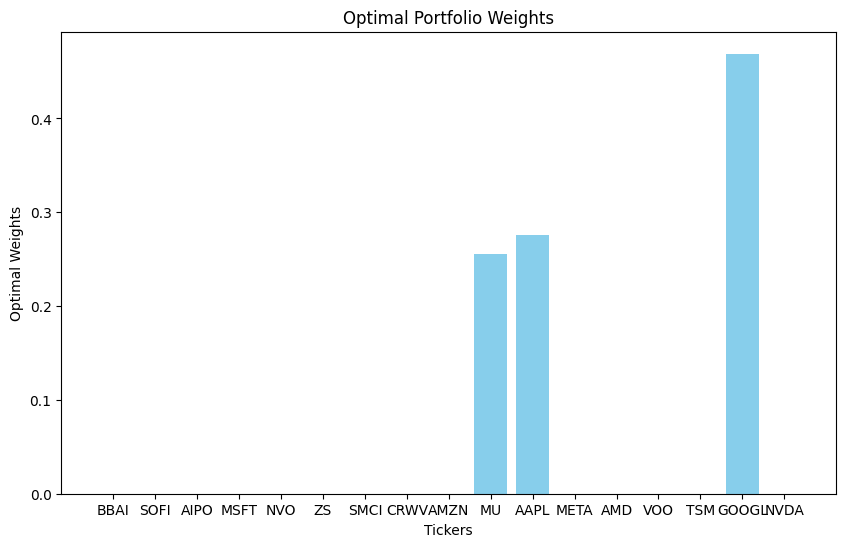

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(tickers, optimal_weights, color='skyblue')

plt.xlabel('Tickers')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()